PREDIKSI DEPRESI MAHASISWA BERDASARKAN POLA TIDUR DAN AKTIVITAS HARIAN <br>
machine learning untuk memprediksi depresi pada mahasiswa

Dewa Putra Anugrah (23.61.0260) <br>
Big Data and Data Mining (ST168) <br>
Universitas Amikom Yogyakarta

In [1]:
# ==================== IMPORT LIBRARIES ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Machine Learning Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, classification_report,
                             confusion_matrix, roc_curve)


In [3]:
# Feature Selection
from sklearn.feature_selection import mutual_info_classif, SelectKBest


In [4]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [5]:
# Styling
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("=" * 80)
print("PREDIKSI DEPRESI MAHASISWA - SISTEM MACHINE LEARNING")
print("=" * 80)
print()


PREDIKSI DEPRESI MAHASISWA - SISTEM MACHINE LEARNING



###STEP 1: LOAD DATASET

In [6]:
#==================== 1. LOAD DATASET ====================
print(" STEP 1: LOADING DATASET")
print("-" * 80)

# Upload file ke Colab
from google.colab import files
uploaded = files.upload()

 STEP 1: LOADING DATASET
--------------------------------------------------------------------------------


Saving student_depression_dataset.csv to student_depression_dataset.csv


In [8]:
from google.colab import drive
drive.mount('/content/drive')
# Then copy the file to your Drive
!cp student_depression_dataset.csv /content/drive/MyDrive/

Mounted at /content/drive


In [9]:
# Baca dataset
df = pd.read_csv('student_depression_dataset.csv')

print(f" Dataset berhasil dimuat!")
print(f" Jumlah baris: {df.shape[0]:,}")
print(f" Jumlah kolom: {df.shape[1]}")
print()

 Dataset berhasil dimuat!
 Jumlah baris: 27,901
 Jumlah kolom: 18



In [10]:
# Tampilkan info dataset
print("📋 Informasi Dataset:")
print(df.info())
print()

📋 Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-

In [11]:
# Tampilkan sample data
print(" Sample Data (5 baris pertama):")
print(df.head())
print()


 Sample Data (5 baris pertama):
   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

        Sleep Duration Dietary Habits   Degree  \
0          '5-6 hours'        Healthy  B.Pharm   
1          '5-6 hours'       Moderate      BSc   
2  'Less than 5 hours'  


###STEP 2: EXPLORATORY DATA ANALYSIS (EDA)


In [12]:
# Statistik deskriptif
print(" Statistik Deskriptif:")
print(df.describe())
print()


 Statistik Deskriptif:
                  id           Age  Academic Pressure  Work Pressure  \
count   27901.000000  27901.000000       27901.000000   27901.000000   
mean    70442.149421     25.822300           3.141214       0.000430   
std     40641.175216      4.905687           1.381465       0.043992   
min         2.000000     18.000000           0.000000       0.000000   
25%     35039.000000     21.000000           2.000000       0.000000   
50%     70684.000000     25.000000           3.000000       0.000000   
75%    105818.000000     30.000000           4.000000       0.000000   
max    140699.000000     59.000000           5.000000       5.000000   

               CGPA  Study Satisfaction  Job Satisfaction  Work/Study Hours  \
count  27901.000000        27901.000000      27901.000000      27901.000000   
mean       7.656104            2.943837          0.000681          7.156984   
std        1.470707            1.361148          0.044394          3.707642   
min        0

In [13]:
# Check missing values
print(" Missing Values:")
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing Count': missing.values,
    'Percentage (%)': missing_percent.values
})

# Tampilkan semua kolom atau hanya yang ada missing
if missing.sum() == 0:
    print(" TIDAK ADA MISSING VALUES - Dataset sudah bersih!")
    print(f"   Total kolom dicek: {len(df.columns)}")
    print(f"   Total baris: {len(df):,}")
else:
    print(" Ditemukan Missing Values:")
    print(missing_df[missing_df['Missing Count'] > 0].to_string(index=False))
    print(f"\n Total missing values: {missing.sum():,}")
print()

 Missing Values:
 TIDAK ADA MISSING VALUES - Dataset sudah bersih!
   Total kolom dicek: 18
   Total baris: 27,901



In [14]:
# Distribusi target variable
print(" Distribusi Target Variable (Depression):")
depression_dist = df['Depression'].value_counts()
depression_percent = df['Depression'].value_counts(normalize=True) * 100
print(f"No Depression (0): {depression_dist[0]:,} ({depression_percent[0]:.2f}%)")
print(f"Depression (1): {depression_dist[1]:,} ({depression_percent[1]:.2f}%)")
print()

 Distribusi Target Variable (Depression):
No Depression (0): 11,565 (41.45%)
Depression (1): 16,336 (58.55%)



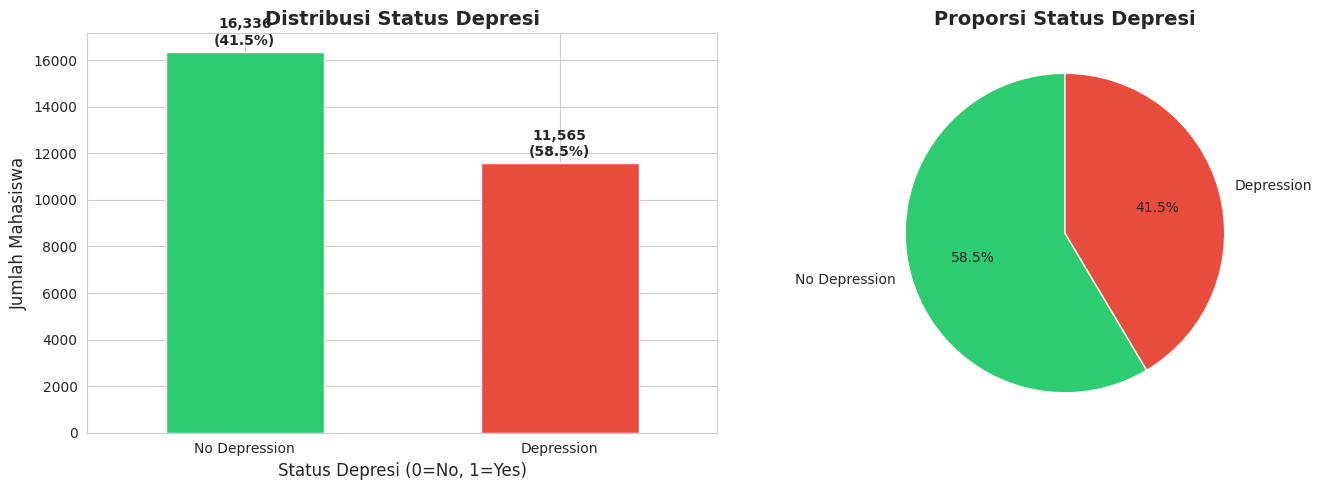

In [15]:
# Visualisasi distribusi target
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
depression_dist.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Distribusi Status Depresi', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Status Depresi (0=No, 1=Yes)', fontsize=12)
axes[0].set_ylabel('Jumlah Mahasiswa', fontsize=12)
axes[0].set_xticklabels(['No Depression', 'Depression'], rotation=0)
for i, v in enumerate(depression_dist):
    axes[0].text(i, v + 200, f'{v:,}\n({depression_percent[i]:.1f}%)',
                ha='center', va='bottom', fontweight='bold')

# Pie chart
axes[1].pie(depression_dist, labels=['No Depression', 'Depression'],
           autopct='%1.1f%%', startangle=90, colors=['#2ecc71', '#e74c3c'])
axes[1].set_title('Proporsi Status Depresi', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()
print()



 Distribusi Fitur Numerik Utama:


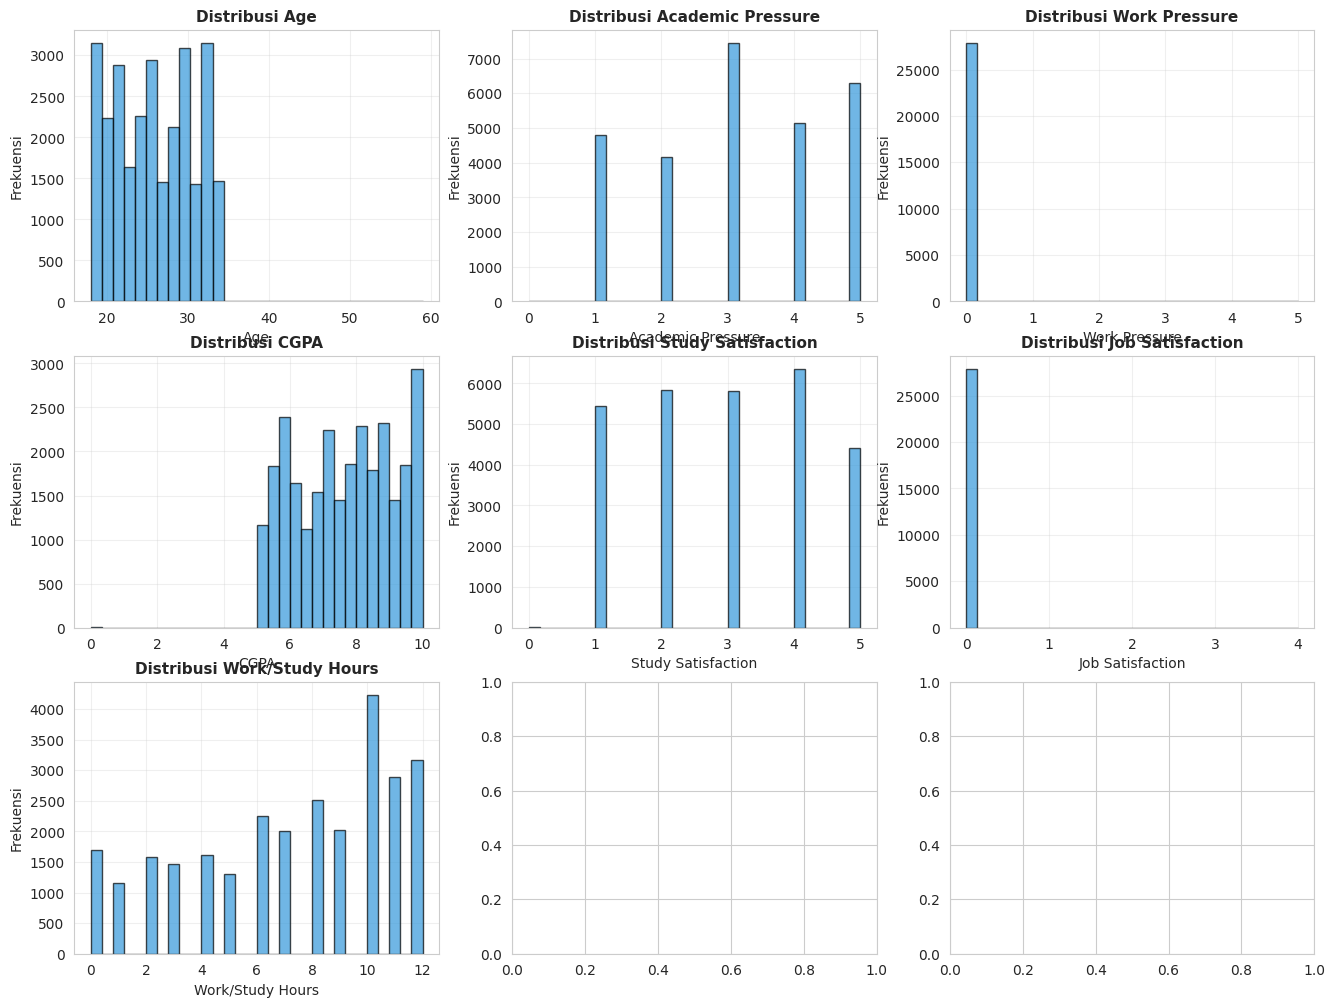

In [16]:
# Distribusi fitur numerik
print(" Distribusi Fitur Numerik Utama:")
numeric_cols = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
                'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    if col in df.columns:
        axes[idx].hist(df[col].dropna(), bins=30, color='#3498db', edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribusi {col}', fontsize=11, fontweight='bold')
        axes[idx].set_xlabel(col, fontsize=10)
        axes[idx].set_ylabel('Frekuensi', fontsize=10)
        axes[idx].grid(True, alpha=0.3)

In [17]:
# Hapus subplot yang tidak digunakan
for idx in range(len(numeric_cols), 9):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()
print()

<Figure size 1200x600 with 0 Axes>

 Korelasi Fitur Numerik dengan Depression:
Depression                               1.000000
Have you ever had suicidal thoughts ?    0.546277
Academic Pressure                        0.474835
Financial Stress                         0.363382
Work/Study Hours                         0.208563
Dietary Habits                           0.206605
Family History of Mental Illness         0.053430
CGPA                                     0.022210
Gender                                   0.001794
id                                       0.000923
Work Pressure                           -0.003351
Job Satisfaction                        -0.003482
Profession                              -0.016997
Sleep Duration                          -0.022411
City                                    -0.024412
Degree                                  -0.086890
Study Satisfaction                      -0.167971
Age                                     -0.226422
Name: Depression, dtype: float64



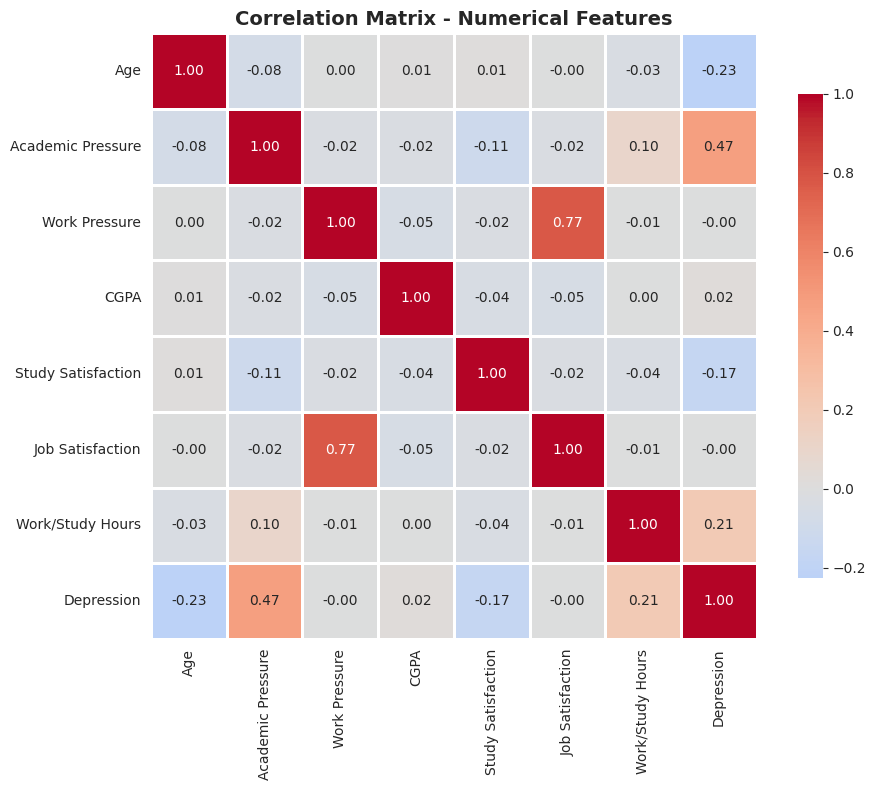

In [18]:
# Analisis korelasi dengan target
print(" Korelasi Fitur Numerik dengan Depression:")
# Encode target terlebih dahulu untuk korelasi
df_corr = df.copy()
for col in df_corr.select_dtypes(include=['object']).columns:
    if col != 'Depression':
        le = LabelEncoder()
        df_corr[col] = le.fit_transform(df_corr[col].astype(str))

correlation_with_target = df_corr.corr()['Depression'].sort_values(ascending=False)
print(correlation_with_target)
print()

# Visualisasi korelasi
plt.figure(figsize=(10, 8))
corr_matrix = df_corr[numeric_cols + ['Depression']].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
print()

 Analisis Fitur Kategorikal vs Depression:


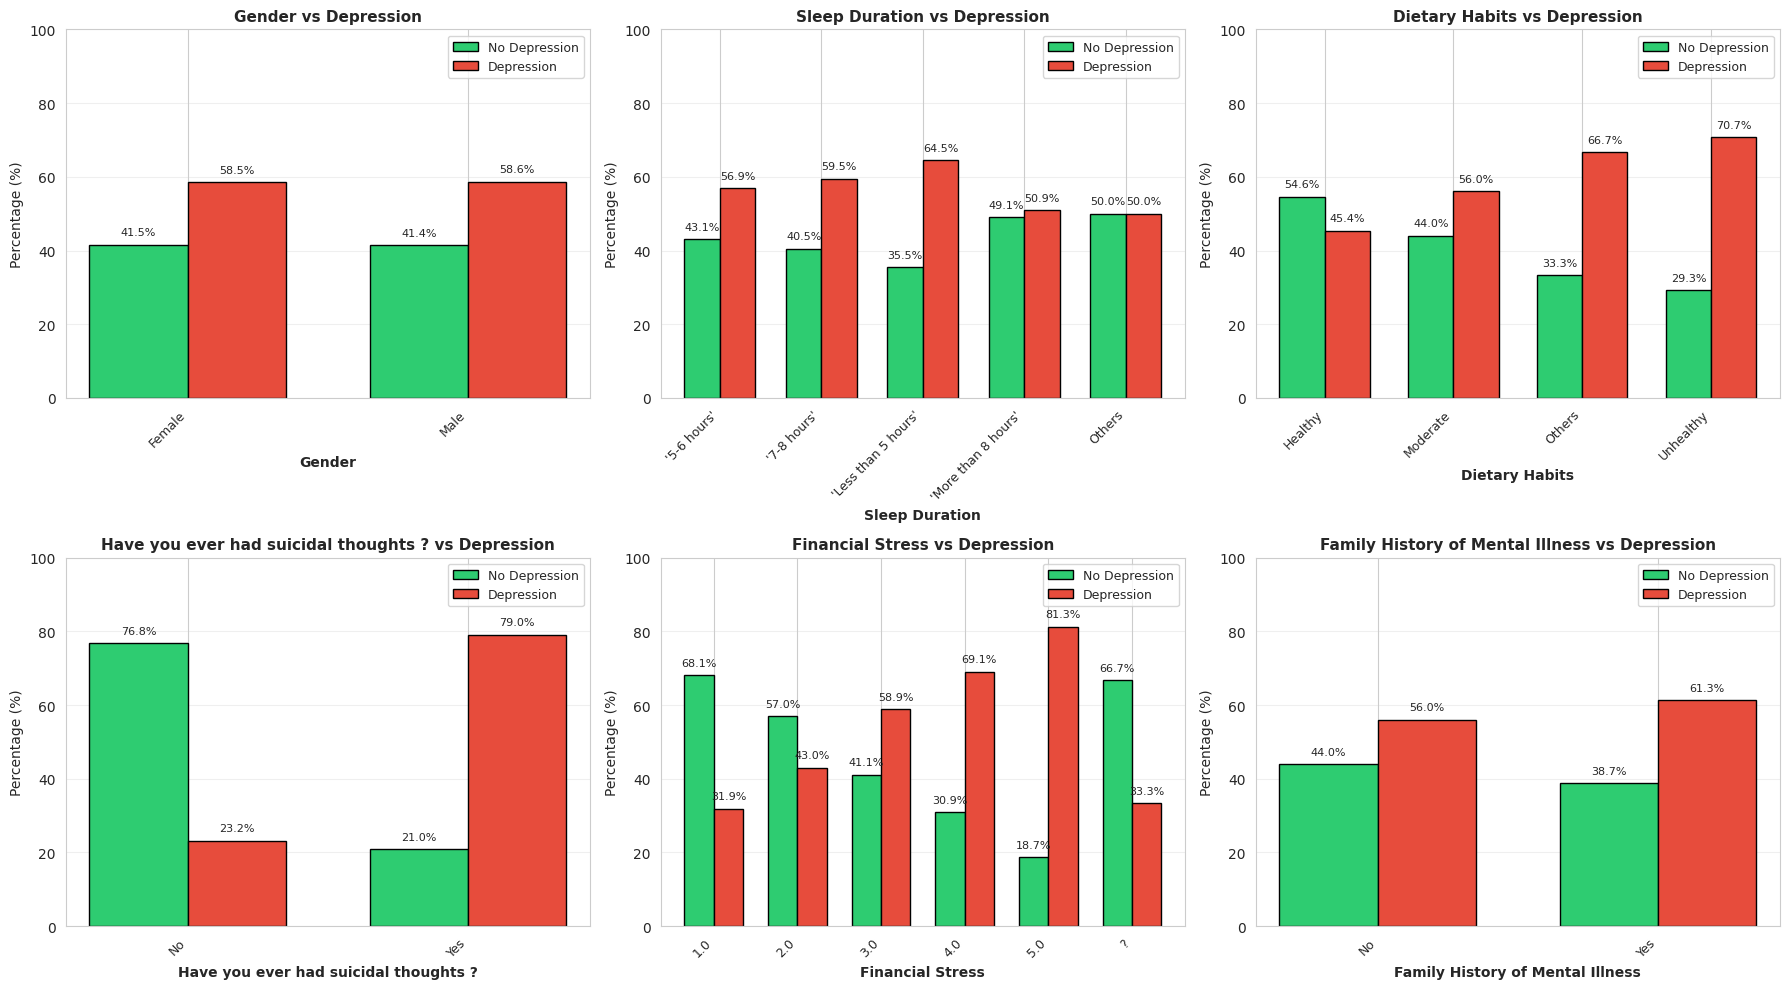

In [19]:
# Analisis fitur kategorikal vs Depression
print(" Analisis Fitur Kategorikal vs Depression:")
categorical_cols = ['Gender', 'Sleep Duration', 'Dietary Habits',
                   'Have you ever had suicidal thoughts ?', 'Financial Stress',
                   'Family History of Mental Illness']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    if col in df.columns:
        # Buat crosstab
        ct = pd.crosstab(df[col], df['Depression'], normalize='index') * 100

        # Plot menggunakan bar plot manual
        categories = ct.index
        no_depression = ct[0].values if 0 in ct.columns else [0] * len(categories)
        depression = ct[1].values if 1 in ct.columns else [0] * len(categories)

        x = np.arange(len(categories))
        width = 0.35

        bars1 = axes[idx].bar(x - width/2, no_depression, width,
                             label='No Depression', color='#2ecc71', edgecolor='black')
        bars2 = axes[idx].bar(x + width/2, depression, width,
                             label='Depression', color='#e74c3c', edgecolor='black')

        axes[idx].set_xlabel(col, fontsize=10, fontweight='bold')
        axes[idx].set_ylabel('Percentage (%)', fontsize=10)
        axes[idx].set_title(f'{col} vs Depression', fontsize=11, fontweight='bold')
        axes[idx].set_xticks(x)
        axes[idx].set_xticklabels(categories, rotation=45, ha='right', fontsize=9)
        axes[idx].legend(loc='best', fontsize=9)
        axes[idx].grid(True, alpha=0.3, axis='y')
        axes[idx].set_ylim([0, 100])

        # Tambahkan label nilai
        for bar in bars1:
            height = bar.get_height()
            if height > 0:
                axes[idx].text(bar.get_x() + bar.get_width()/2., height + 2,
                             f'{height:.1f}%', ha='center', va='bottom', fontsize=8)
        for bar in bars2:
            height = bar.get_height()
            if height > 0:
                axes[idx].text(bar.get_x() + bar.get_width()/2., height + 2,
                             f'{height:.1f}%', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()
print()

In [20]:
# ==================== 3. DATA PREPROCESSING ====================
print("\n" + "=" * 80)
print(" STEP 3: DATA PREPROCESSING")
print("-" * 80)

# Buat copy dataset
df_processed = df.copy()

# Handle missing values
print(" Handling Missing Values...")
initial_rows = len(df_processed)
df_processed = df_processed.dropna()
final_rows = len(df_processed)
print(f"   Rows sebelum: {initial_rows:,}")
print(f"   Rows sesudah: {final_rows:,}")
print(f"   Rows dihapus: {initial_rows - final_rows:,}")
print()

# Label Encoding untuk fitur kategorikal
print(" Label Encoding untuk Fitur Kategorikal...")
label_encoders = {}
categorical_columns = df_processed.select_dtypes(include=['object']).columns

for col in categorical_columns:
    if col not in ['id']:  # Skip id column
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col].astype(str))
        label_encoders[col] = le
        print(f"   ✓ {col}: {len(le.classes_)} kategori")
print()

# Drop kolom yang tidak diperlukan
print(" Menghapus kolom yang tidak diperlukan...")
if 'id' in df_processed.columns:
    df_processed = df_processed.drop('id', axis=1)
    print("    Kolom 'id' dihapus")
print()

print(" Preprocessing selesai!")
print(f" Dataset final: {df_processed.shape[0]} rows × {df_processed.shape[1]} columns")
print()


 STEP 3: DATA PREPROCESSING
--------------------------------------------------------------------------------
 Handling Missing Values...
   Rows sebelum: 27,901
   Rows sesudah: 27,901
   Rows dihapus: 0

 Label Encoding untuk Fitur Kategorikal...
   ✓ Gender: 2 kategori
   ✓ City: 52 kategori
   ✓ Profession: 14 kategori
   ✓ Sleep Duration: 5 kategori
   ✓ Dietary Habits: 4 kategori
   ✓ Degree: 28 kategori
   ✓ Have you ever had suicidal thoughts ?: 2 kategori
   ✓ Financial Stress: 6 kategori
   ✓ Family History of Mental Illness: 2 kategori

 Menghapus kolom yang tidak diperlukan...
    Kolom 'id' dihapus

 Preprocessing selesai!
 Dataset final: 27901 rows × 17 columns




 STEP 4: FEATURE SELECTION
--------------------------------------------------------------------------------
 Features shape: (27901, 16)
 Target shape: (27901,)

1️ Mutual Information Score:
                                  Feature  MI Score
12  Have you ever had suicidal thoughts ?  0.156323
4                       Academic Pressure  0.121592
14                       Financial Stress  0.069860
1                                     Age  0.030710
10                         Dietary Habits  0.023117
13                       Work/Study Hours  0.022130
7                      Study Satisfaction  0.018726
11                                 Degree  0.012546
15       Family History of Mental Illness  0.010733
0                                  Gender  0.003937
6                                    CGPA  0.003126
9                          Sleep Duration  0.003034
2                                    City  0.002234
3                              Profession  0.000000
5                           

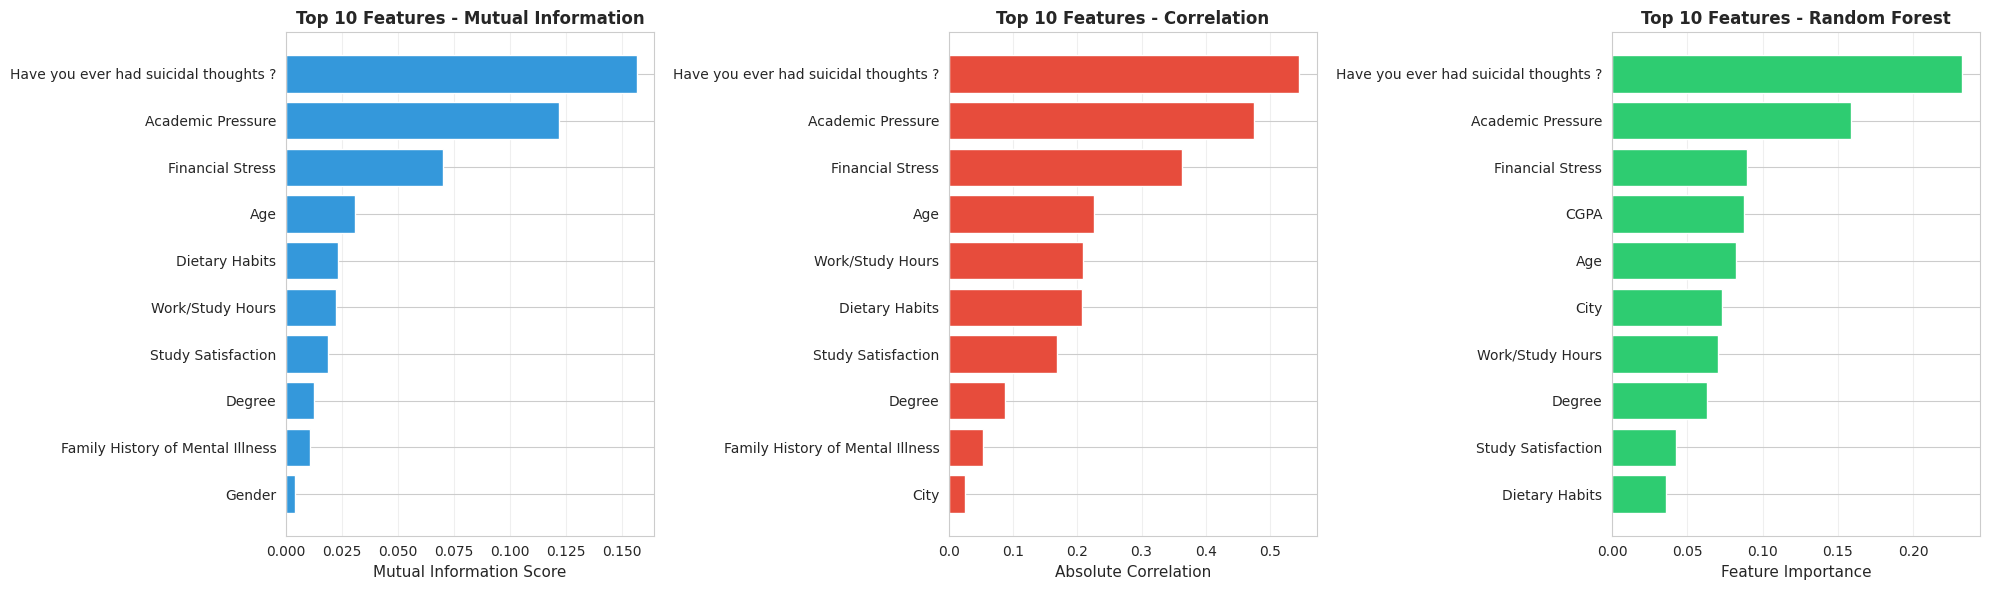


 Memilih Top Features...
Selected features: ['Have you ever had suicidal thoughts ?', 'Academic Pressure', 'Financial Stress', 'CGPA', 'Age', 'City', 'Work/Study Hours', 'Degree', 'Study Satisfaction', 'Dietary Habits']

 Features terpilih: 10 dari 16 features



In [21]:
# ==================== 4. FEATURE SELECTION ====================
print("\n" + "=" * 80)
print(" STEP 4: FEATURE SELECTION")
print("-" * 80)

# Separate features and target
X = df_processed.drop('Depression', axis=1)
y = df_processed['Depression']

print(f" Features shape: {X.shape}")
print(f" Target shape: {y.shape}")
print()

# Method 1: Mutual Information
print("1️ Mutual Information Score:")
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_scores_df = pd.DataFrame({
    'Feature': X.columns,
    'MI Score': mi_scores
}).sort_values('MI Score', ascending=False)
print(mi_scores_df)
print()

# Method 2: Correlation Analysis
print("2️ Correlation with Target:")
correlation_scores = abs(df_processed.corr()['Depression']).sort_values(ascending=False)
print(correlation_scores[1:])  # Exclude Depression itself
print()

# Method 3: Random Forest Feature Importance
print("3️ Random Forest Feature Importance:")
rf_temp = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_temp.fit(X, y)
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_temp.feature_importances_
}).sort_values('Importance', ascending=False)
print(feature_importance_df)
print()

# Visualisasi Feature Importance
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot 1: Mutual Information
axes[0].barh(mi_scores_df['Feature'][:10], mi_scores_df['MI Score'][:10], color='#3498db')
axes[0].set_xlabel('Mutual Information Score', fontsize=11)
axes[0].set_title('Top 10 Features - Mutual Information', fontsize=12, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

# Plot 2: Correlation
corr_top = correlation_scores[1:11]
axes[1].barh(corr_top.index, corr_top.values, color='#e74c3c')
axes[1].set_xlabel('Absolute Correlation', fontsize=11)
axes[1].set_title('Top 10 Features - Correlation', fontsize=12, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3, axis='x')

# Plot 3: Random Forest
axes[2].barh(feature_importance_df['Feature'][:10],
            feature_importance_df['Importance'][:10], color='#2ecc71')
axes[2].set_xlabel('Feature Importance', fontsize=11)
axes[2].set_title('Top 10 Features - Random Forest', fontsize=12, fontweight='bold')
axes[2].invert_yaxis()
axes[2].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()
print()

# Select top features (ambil top 10 berdasarkan gabungan metode)
print(" Memilih Top Features...")
top_features = feature_importance_df.head(10)['Feature'].tolist()
print(f"Selected features: {top_features}")
print()

# Update X dengan selected features
X_selected = X[top_features]
print(f" Features terpilih: {len(top_features)} dari {X.shape[1]} features")
print()

In [22]:
# ==================== 5. SPLIT DATA ====================
print("\n" + "=" * 80)
print(" STEP 5: TRAIN-TEST SPLIT")
print("-" * 80)

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

print(f" Training set: {X_train.shape[0]:,} samples ({(len(X_train)/len(X_selected)*100):.1f}%)")
print(f" Test set: {X_test.shape[0]:,} samples ({(len(X_test)/len(X_selected)*100):.1f}%)")
print()
print(f" Distribution in training set:")
print(f"   No Depression: {(y_train == 0).sum():,} ({(y_train == 0).sum()/len(y_train)*100:.1f}%)")
print(f"   Depression: {(y_train == 1).sum():,} ({(y_train == 1).sum()/len(y_train)*100:.1f}%)")
print()


 STEP 5: TRAIN-TEST SPLIT
--------------------------------------------------------------------------------
 Training set: 22,320 samples (80.0%)
 Test set: 5,581 samples (20.0%)

 Distribution in training set:
   No Depression: 9,252 (41.5%)
   Depression: 13,068 (58.5%)



In [23]:
# ==================== 6. MODEL TRAINING ====================
print("\n" + "=" * 80)
print(" STEP 6: MODEL TRAINING & EVALUATION")
print("-" * 80)

# Dictionary untuk menyimpan hasil
results = {}
models_dict = {}

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

print("Training models...\n")

for name, model in models.items():
    print(f" Training {name}...")

    # Train model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'CV Mean': cv_mean,
        'CV Std': cv_std,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

    models_dict[name] = model

    print(f"    {name} trained successfully!")
    print(f"      Accuracy: {accuracy:.4f}")
    print(f"      F1-Score: {f1:.4f}")
    print(f"      ROC-AUC: {roc_auc:.4f}")
    print(f"      CV Score: {cv_mean:.4f} ± {cv_std:.4f}")
    print()


 STEP 6: MODEL TRAINING & EVALUATION
--------------------------------------------------------------------------------
Training models...

 Training Logistic Regression...
    Logistic Regression trained successfully!
      Accuracy: 0.8445
      F1-Score: 0.8689
      ROC-AUC: 0.9176
      CV Score: 0.8459 ± 0.0078

 Training Decision Tree...
    Decision Tree trained successfully!
      Accuracy: 0.7569
      F1-Score: 0.7911
      ROC-AUC: 0.7508
      CV Score: 0.7707 ± 0.0100

 Training Random Forest...
    Random Forest trained successfully!
      Accuracy: 0.8369
      F1-Score: 0.8627
      ROC-AUC: 0.9099
      CV Score: 0.8405 ± 0.0063

 Training Gradient Boosting...
    Gradient Boosting trained successfully!
      Accuracy: 0.8450
      F1-Score: 0.8697
      ROC-AUC: 0.9179
      CV Score: 0.8469 ± 0.0073




 STEP 7: MODEL COMPARISON
--------------------------------------------------------------------------------
 Performance Metrics:
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC  CV Mean   CV Std
Logistic Regression  0.844472   0.857782 0.880355  0.868922 0.917646 0.845878 0.007763
      Decision Tree  0.756854   0.796095 0.786108  0.791070 0.750814 0.770654 0.010017
      Random Forest  0.836947   0.851102 0.874541  0.862662 0.909935 0.840502 0.006290
  Gradient Boosting  0.845010   0.856634 0.883109  0.869670 0.917912 0.846864 0.007337

 BEST MODEL: Gradient Boosting
   F1-Score: 0.8697



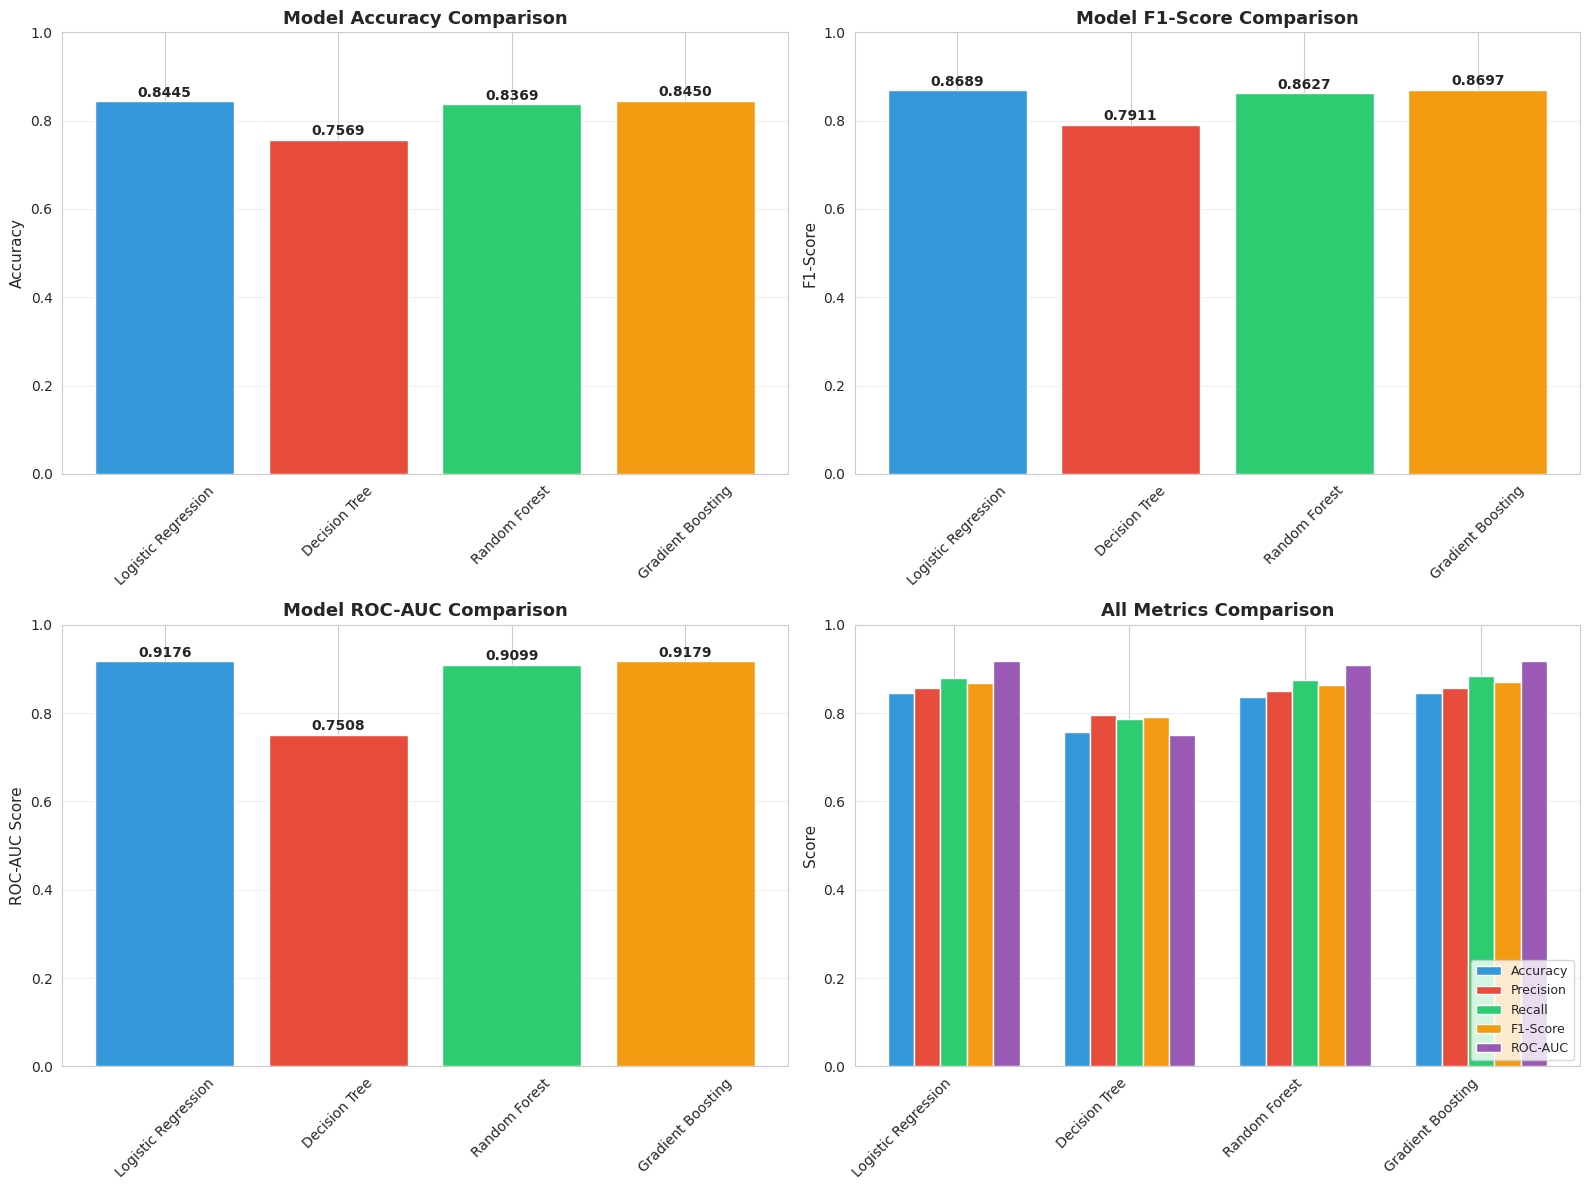

In [24]:
# ==================== 7. RESULTS COMPARISON ====================
print("\n" + "=" * 80)
print(" STEP 7: MODEL COMPARISON")
print("-" * 80)

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['Accuracy'] for m in results.keys()],
    'Precision': [results[m]['Precision'] for m in results.keys()],
    'Recall': [results[m]['Recall'] for m in results.keys()],
    'F1-Score': [results[m]['F1-Score'] for m in results.keys()],
    'ROC-AUC': [results[m]['ROC-AUC'] for m in results.keys()],
    'CV Mean': [results[m]['CV Mean'] for m in results.keys()],
    'CV Std': [results[m]['CV Std'] for m in results.keys()]
})

print(" Performance Metrics:")
print(comparison_df.to_string(index=False))
print()

# Find best model
best_model_name = comparison_df.loc[comparison_df['F1-Score'].idxmax(), 'Model']
print(f" BEST MODEL: {best_model_name}")
print(f"   F1-Score: {comparison_df.loc[comparison_df['F1-Score'].idxmax(), 'F1-Score']:.4f}")
print()

# Visualisasi perbandingan model
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Accuracy Comparison
axes[0, 0].bar(comparison_df['Model'], comparison_df['Accuracy'],
              color=['#3498db', '#e74c3c', '#2ecc71', '#f39c12'])
axes[0, 0].set_title('Model Accuracy Comparison', fontsize=13, fontweight='bold')
axes[0, 0].set_ylabel('Accuracy', fontsize=11)
axes[0, 0].set_ylim([0, 1])
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(comparison_df['Accuracy']):
    axes[0, 0].text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold')

# Plot 2: F1-Score Comparison
axes[0, 1].bar(comparison_df['Model'], comparison_df['F1-Score'],
              color=['#3498db', '#e74c3c', '#2ecc71', '#f39c12'])
axes[0, 1].set_title('Model F1-Score Comparison', fontsize=13, fontweight='bold')
axes[0, 1].set_ylabel('F1-Score', fontsize=11)
axes[0, 1].set_ylim([0, 1])
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(comparison_df['F1-Score']):
    axes[0, 1].text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold')

# Plot 3: ROC-AUC Comparison
axes[1, 0].bar(comparison_df['Model'], comparison_df['ROC-AUC'],
              color=['#3498db', '#e74c3c', '#2ecc71', '#f39c12'])
axes[1, 0].set_title('Model ROC-AUC Comparison', fontsize=13, fontweight='bold')
axes[1, 0].set_ylabel('ROC-AUC Score', fontsize=11)
axes[1, 0].set_ylim([0, 1])
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(comparison_df['ROC-AUC']):
    axes[1, 0].text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold')

# Plot 4: All Metrics Comparison
metrics_df = comparison_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']]
x = np.arange(len(metrics_df['Model']))
width = 0.15

axes[1, 1].bar(x - 2*width, metrics_df['Accuracy'], width, label='Accuracy', color='#3498db')
axes[1, 1].bar(x - width, metrics_df['Precision'], width, label='Precision', color='#e74c3c')
axes[1, 1].bar(x, metrics_df['Recall'], width, label='Recall', color='#2ecc71')
axes[1, 1].bar(x + width, metrics_df['F1-Score'], width, label='F1-Score', color='#f39c12')
axes[1, 1].bar(x + 2*width, metrics_df['ROC-AUC'], width, label='ROC-AUC', color='#9b59b6')

axes[1, 1].set_title('All Metrics Comparison', fontsize=13, fontweight='bold')
axes[1, 1].set_ylabel('Score', fontsize=11)
axes[1, 1].set_ylim([0, 1])
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(metrics_df['Model'], rotation=45, ha='right')
axes[1, 1].legend(loc='lower right', fontsize=9)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()
print()


 STEP 8: DETAILED ANALYSIS - Gradient Boosting
--------------------------------------------------------------------------------
 Classification Report:
               precision    recall  f1-score   support

No Depression       0.83      0.79      0.81      2313
   Depression       0.86      0.88      0.87      3268

     accuracy                           0.85      5581
    macro avg       0.84      0.84      0.84      5581
 weighted avg       0.84      0.85      0.84      5581


 Confusion Matrix:
[[1830  483]
 [ 382 2886]]



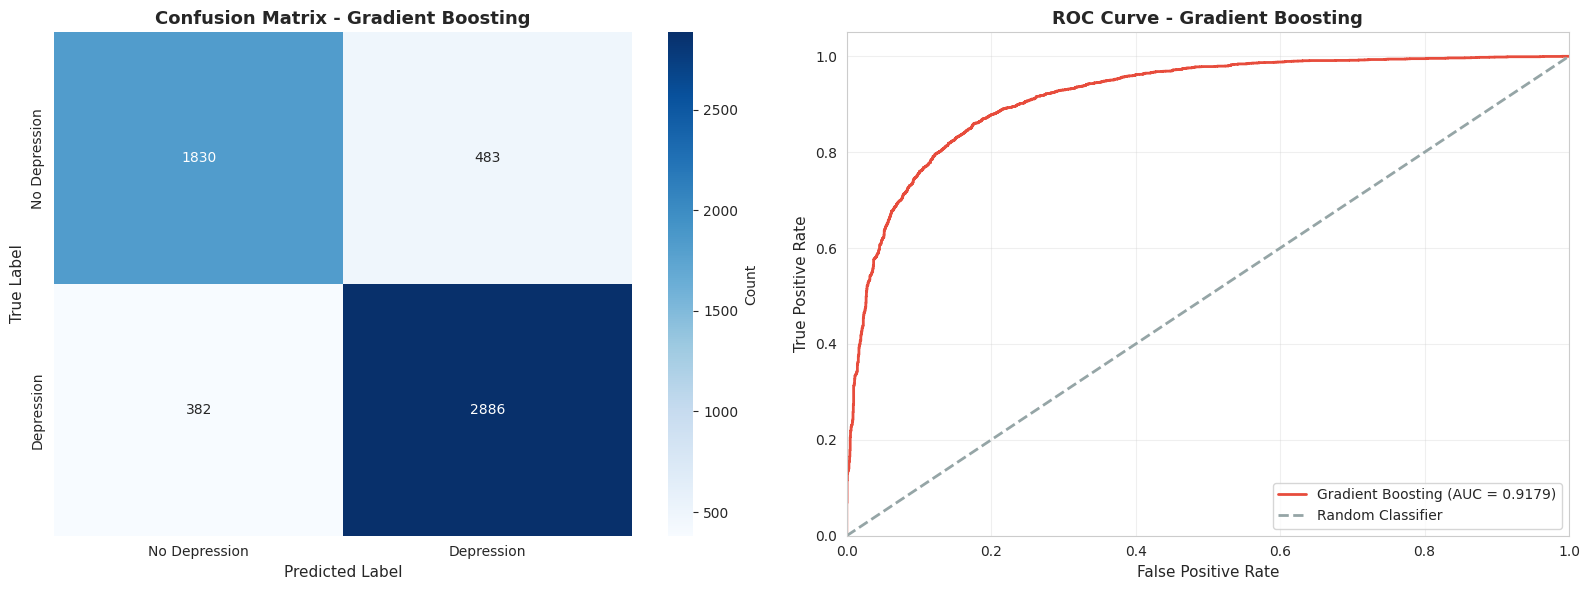


 Feature Importance dari Best Model:
                                 Feature  Importance
0  Have you ever had suicidal thoughts ?    0.520421
1                      Academic Pressure    0.240171
2                       Financial Stress    0.117362
4                                    Age    0.048079
6                       Work/Study Hours    0.027523
9                         Dietary Habits    0.026072
8                     Study Satisfaction    0.013924
3                                   CGPA    0.003526
7                                 Degree    0.001840
5                                   City    0.001084



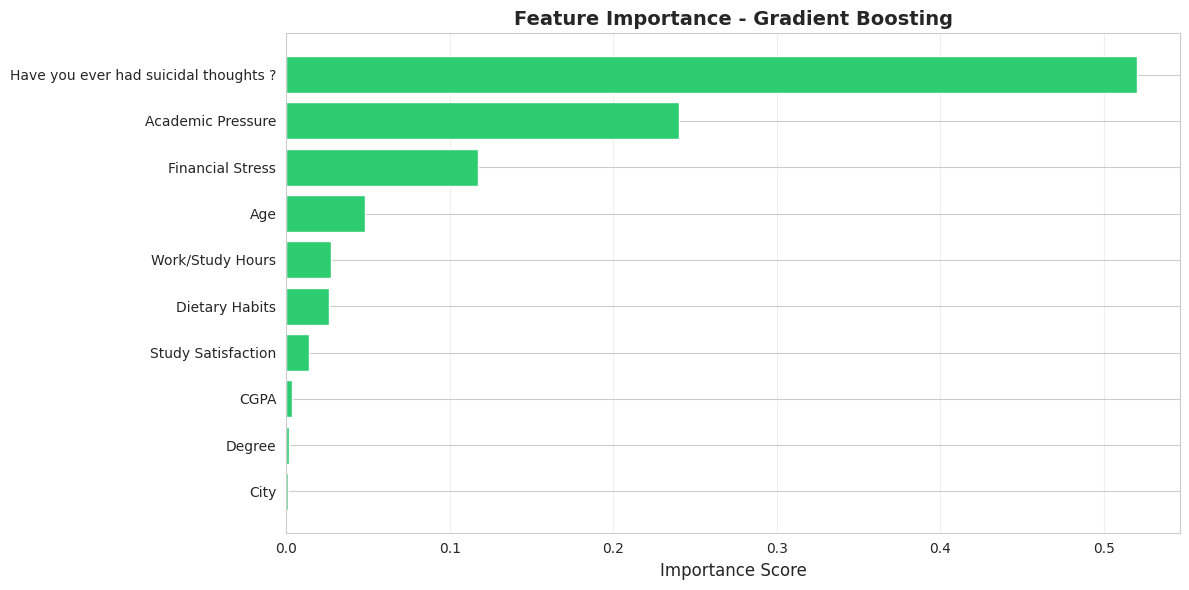

In [25]:
# ==================== 8. DETAILED ANALYSIS OF BEST MODEL ====================
print("\n" + "=" * 80)
print(f" STEP 8: DETAILED ANALYSIS - {best_model_name}")
print("-" * 80)

best_model = models_dict[best_model_name]
y_pred_best = results[best_model_name]['y_pred']
y_pred_proba_best = results[best_model_name]['y_pred_proba']

# Classification Report
print(" Classification Report:")
print(classification_report(y_test, y_pred_best,
                           target_names=['No Depression', 'Depression']))
print()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
print(" Confusion Matrix:")
print(cm)
print()

# Visualisasi Confusion Matrix dan ROC Curve
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
           xticklabels=['No Depression', 'Depression'],
           yticklabels=['No Depression', 'Depression'],
           cbar_kws={'label': 'Count'})
axes[0].set_title(f'Confusion Matrix - {best_model_name}', fontsize=13, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=11)
axes[0].set_xlabel('Predicted Label', fontsize=11)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best)
roc_auc = roc_auc_score(y_test, y_pred_proba_best)

axes[1].plot(fpr, tpr, color='#e74c3c', lw=2,
            label=f'{best_model_name} (AUC = {roc_auc:.4f})')
axes[1].plot([0, 1], [0, 1], color='#95a5a6', lw=2, linestyle='--', label='Random Classifier')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate', fontsize=11)
axes[1].set_ylabel('True Positive Rate', fontsize=11)
axes[1].set_title(f'ROC Curve - {best_model_name}', fontsize=13, fontweight='bold')
axes[1].legend(loc="lower right", fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print()

# Feature Importance untuk Best Model (jika tersedia)
if hasattr(best_model, 'feature_importances_'):
    print(" Feature Importance dari Best Model:")
    feature_imp_best = pd.DataFrame({
        'Feature': X_selected.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    print(feature_imp_best)
    print()

    # Plot Feature Importance
    plt.figure(figsize=(12, 6))
    plt.barh(feature_imp_best['Feature'], feature_imp_best['Importance'], color='#2ecc71')
    plt.xlabel('Importance Score', fontsize=12)
    plt.title(f'Feature Importance - {best_model_name}', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()
    print()



 STEP 9: HYPERPARAMETER TUNING - Gradient Boosting
--------------------------------------------------------------------------------
 Melakukan Grid Search untuk Gradient Boosting...
 Ini mungkin memakan waktu beberapa menit...

Fitting 5 folds for each of 54 candidates, totalling 270 fits

 Grid Search selesai!
 Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}
 Best CV Score: 0.8716

 Performance After Tuning:
   Accuracy: 0.8450
   Precision: 0.8566
   Recall: 0.8831
   F1-Score: 0.8697
   ROC-AUC: 0.9179

 Perbandingan Sebelum dan Sesudah Tuning:
   Metric  Before Tuning  After Tuning  Improvement
 Accuracy       0.845010      0.845010          0.0
Precision       0.856634      0.856634          0.0
   Recall       0.883109      0.883109          0.0
 F1-Score       0.869670      0.869670          0.0
  ROC-AUC       0.917912      0.917912          0.0



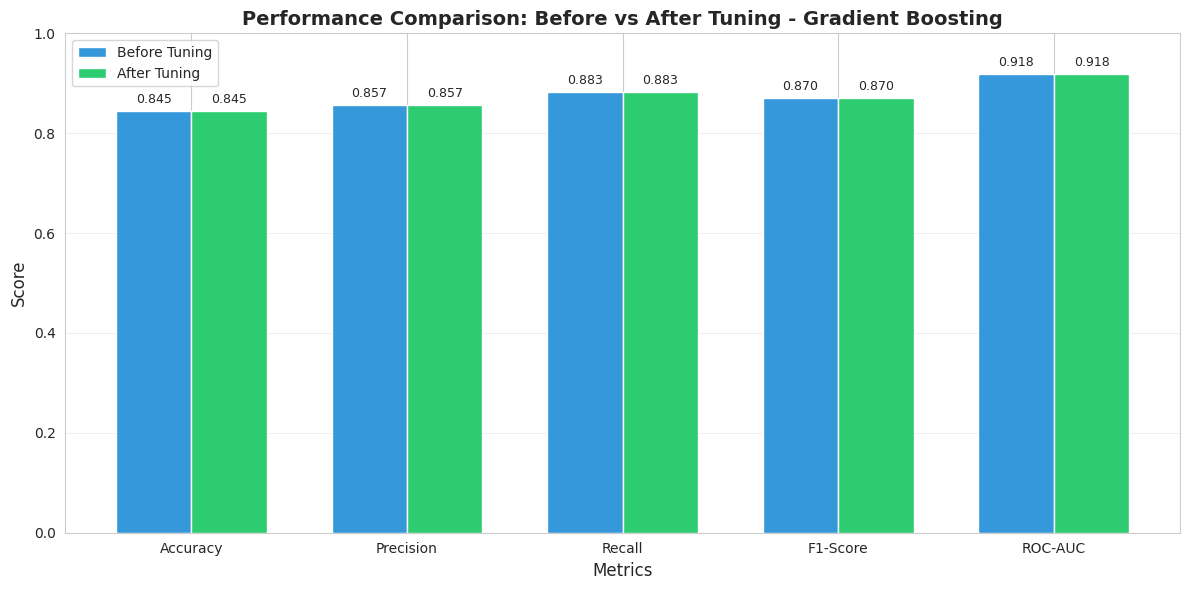

In [26]:
# ==================== 9. HYPERPARAMETER TUNING ====================
print("\n" + "=" * 80)
print(f" STEP 9: HYPERPARAMETER TUNING - {best_model_name}")
print("-" * 80)

# Define parameter grids untuk setiap model
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear']
    },
    'Decision Tree': {
        'max_depth': [5, 10, 15, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5]
    }
}

print(f" Melakukan Grid Search untuk {best_model_name}...")
print(" Ini mungkin memakan waktu beberapa menit...")
print()

# Grid Search
if best_model_name in param_grids:
    grid_search = GridSearchCV(
        estimator=models[best_model_name],
        param_grid=param_grids[best_model_name],
        cv=5,
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train, y_train)

    print(f"\n Grid Search selesai!")
    print(f" Best Parameters: {grid_search.best_params_}")
    print(f" Best CV Score: {grid_search.best_score_:.4f}")
    print()

    # Evaluate tuned model
    best_tuned_model = grid_search.best_estimator_
    y_pred_tuned = best_tuned_model.predict(X_test)
    y_pred_proba_tuned = best_tuned_model.predict_proba(X_test)[:, 1]

    accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
    precision_tuned = precision_score(y_test, y_pred_tuned)
    recall_tuned = recall_score(y_test, y_pred_tuned)
    f1_tuned = f1_score(y_test, y_pred_tuned)
    roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)

    print(" Performance After Tuning:")
    print(f"   Accuracy: {accuracy_tuned:.4f}")
    print(f"   Precision: {precision_tuned:.4f}")
    print(f"   Recall: {recall_tuned:.4f}")
    print(f"   F1-Score: {f1_tuned:.4f}")
    print(f"   ROC-AUC: {roc_auc_tuned:.4f}")
    print()

    # Comparison before and after tuning
    print(" Perbandingan Sebelum dan Sesudah Tuning:")
    tuning_comparison = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
        'Before Tuning': [
            results[best_model_name]['Accuracy'],
            results[best_model_name]['Precision'],
            results[best_model_name]['Recall'],
            results[best_model_name]['F1-Score'],
            results[best_model_name]['ROC-AUC']
        ],
        'After Tuning': [
            accuracy_tuned, precision_tuned, recall_tuned, f1_tuned, roc_auc_tuned
        ]
    })
    tuning_comparison['Improvement'] = tuning_comparison['After Tuning'] - tuning_comparison['Before Tuning']
    print(tuning_comparison.to_string(index=False))
    print()

    # Visualisasi comparison
    fig, ax = plt.subplots(figsize=(12, 6))
    x = np.arange(len(tuning_comparison['Metric']))
    width = 0.35

    ax.bar(x - width/2, tuning_comparison['Before Tuning'], width,
          label='Before Tuning', color='#3498db')
    ax.bar(x + width/2, tuning_comparison['After Tuning'], width,
          label='After Tuning', color='#2ecc71')

    ax.set_xlabel('Metrics', fontsize=12)
    ax.set_ylabel('Score', fontsize=12)
    ax.set_title(f'Performance Comparison: Before vs After Tuning - {best_model_name}',
                fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(tuning_comparison['Metric'])
    ax.legend()
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_ylim([0, 1])

    # Add value labels
    for i, (before, after) in enumerate(zip(tuning_comparison['Before Tuning'],
                                            tuning_comparison['After Tuning'])):
        ax.text(i - width/2, before + 0.01, f'{before:.3f}',
               ha='center', va='bottom', fontsize=9)
        ax.text(i + width/2, after + 0.01, f'{after:.3f}',
               ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()
    print()

In [27]:
# ==================== 10. SAVE FINAL MODEL ====================
print("\n" + "=" * 80)
print(" STEP 10: SAVING FINAL MODEL")
print("-" * 80)

import pickle

# Save best tuned model
final_model = best_tuned_model if 'best_tuned_model' in locals() else best_model

# Save model
model_filename = f'{best_model_name.replace(" ", "_").lower()}_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(final_model, file)
print(f" Model disimpan sebagai: {model_filename}")

# Save label encoders
with open('label_encoders.pkl', 'wb') as file:
    pickle.dump(label_encoders, file)
print(f" Label encoders disimpan sebagai: label_encoders.pkl")

# Save selected features
with open('selected_features.pkl', 'wb') as file:
    pickle.dump(top_features, file)
print(f" Selected features disimpan sebagai: selected_features.pkl")
print()


 STEP 10: SAVING FINAL MODEL
--------------------------------------------------------------------------------
 Model disimpan sebagai: gradient_boosting_model.pkl
 Label encoders disimpan sebagai: label_encoders.pkl
 Selected features disimpan sebagai: selected_features.pkl



In [28]:
# ==================== 11. PREDICTION FUNCTION ====================
print("\n" + "=" * 80)
print(" STEP 11: PREDICTION FUNCTION")
print("-" * 80)

def predict_depression(input_data, model, features, encoders, modes_encoded):
    """
    Fungsi untuk memprediksi depresi berdasarkan input data mahasiswa

    Parameters:
    -----------
    input_data : dict
        Dictionary berisi data mahasiswa
    model : sklearn model
        Model yang sudah ditraining
    features : list
        List fitur yang digunakan
    encoders : dict
        Dictionary label encoders
    modes_encoded : dict
        Dictionary of encoded modes for each categorical column, to handle unseen labels

    Returns:
    --------
    dict : Hasil prediksi dan probabilitas
    """
    # Convert input to DataFrame
    df_input = pd.DataFrame([input_data])

    # Encode categorical features
    for col in df_input.select_dtypes(include=['object']).columns:
        if col in encoders:
            le = encoders[col]
            # Check if the input value is in the encoder's known classes
            if df_input[col].iloc[0] not in le.classes_:
                # If unseen, replace with the encoded mode of that column
                df_input[col] = modes_encoded.get(col, -1) # Use -1 or a default if mode not found
                print(f"    Warning: Unseen label '{input_data[col]}' for column '{col}'. Replacing with encoded mode: {modes_encoded.get(col, 'N/A')}")
            else:
                df_input[col] = le.transform(df_input[col].astype(str))
        # Numeric columns that are in features but not in encoders are left as is
        # Columns not in features are dropped later implicitly by df_input[features]

    # Select features
    df_input = df_input[features]

    # Prediction
    prediction = model.predict(df_input)[0]
    probability = model.predict_proba(df_input)[0]

    result = {
        'prediction': 'Depression' if prediction == 1 else 'No Depression',
        'probability_no_depression': probability[0],
        'probability_depression': probability[1],
        'risk_level': 'High' if probability[1] > 0.7 else 'Medium' if probability[1] > 0.4 else 'Low'
    }

    return result

print(" Fungsi prediksi telah dibuat!")
print()

# Calculate and store encoded modes for categorical features
# This needs to be done after label_encoders are fitted (in step 3)
modes_encoded = {}
for col, le in label_encoders.items():
    # Get the mode from the original (unencoded) df_processed column
    # Convert to string to ensure consistency with .astype(str) used during fit/transform
    mode_value_original = df_processed[col].mode()[0]
    if str(mode_value_original) in le.classes_:
        modes_encoded[col] = le.transform([str(mode_value_original)])[0]
    else:
        # Fallback if mode itself is not in classes (unlikely if fitted correctly)
        modes_encoded[col] = -1 # Assign an arbitrary out-of-band value or handle as needed

# Contoh penggunaan
print(" Contoh Penggunaan Fungsi Prediksi:")
print("-" * 80)

# Sample input
sample_input = {
    'Gender': 'Male',
    'Age': 22.0,
    'City': 'Mumbai',
    'Profession': 'Student',
    'Academic Pressure': 4.0,
    'Work Pressure': 2.0,
    'CGPA': 7.5,
    'Study Satisfaction': 3.0,
    'Job Satisfaction': 3.0,
    'Sleep Duration': 'Less than 5 hours',
    'Dietary Habits': 'Moderate',
    'Degree': 'BSc',
    'Have you ever had suicidal thoughts ?': 'Yes',
    'Work/Study Hours': 10.0,
    'Financial Stress': 'High',
    'Family History of Mental Illness': 'Yes'
}

print("Input Data:")
for key, value in sample_input.items():
    print(f"   {key}: {value}")
print()

prediction_result = predict_depression(sample_input, final_model, top_features, label_encoders, modes_encoded)

print("Hasil Prediksi:")
print(f"   Status: {prediction_result['prediction']}")
print(f"   Probability No Depression: {prediction_result['probability_no_depression']:.4f}")
print(f"   Probability Depression: {prediction_result['probability_depression']:.4f}")
print(f"   Risk Level: {prediction_result['risk_level']}")
print()

# ==================== 12. SUMMARY & CONCLUSIONS ====================
print("\n" + "=" * 80)
print(" STEP 12: SUMMARY & CONCLUSIONS")
print("=" * 80)
print()

print(" RINGKASAN HASIL ANALISIS:")
print("-" * 80)
print()

print("1️ DATASET:")
print(f"   • Total records: {len(df):,} mahasiswa")
print(f"   • Features: {X.shape[1]} fitur")
print(f"   • Target distribution: {(y==0).sum():,} No Depression ({(y==0).sum()/len(y)*100:.1f}%), "
      f"{(y==1).sum():,} Depression ({(y==1).sum()/len(y)*100:.1f}%)者に")
print()

print("2️ TOP FEATURES YANG MEMPENGARUHI DEPRESI:")
for idx, feature in enumerate(feature_importance_df.head(5)['Feature'], 1):
    importance = feature_importance_df[feature_importance_df['Feature']==feature]['Importance'].values[0]
    print(f"   {idx}. {feature}: {importance:.4f}")
print()

print("3️ MODEL PERFORMANCE:")
print("   Tabel Perbandingan Model:")
print("   " + "-" * 75)
for idx, row in comparison_df.iterrows():
    print(f"   {row['Model']:20s} | Acc: {row['Accuracy']:.4f} | "
          f"F1: {row['F1-Score']:.4f} | ROC-AUC: {row['ROC-AUC']:.4f}")
print("   " + "-" * 75)
print()

print(f"4 BEST MODEL: {best_model_name}")
if 'best_tuned_model' in locals():
    print(f"   • Best Parameters: {grid_search.best_params_}")
    print(f"   • Accuracy: {accuracy_tuned:.4f}")
    print(f"   • F1-Score: {f1_tuned:.4f}")
    print(f"   • ROC-AUC: {roc_auc_tuned:.4f}")
else:
    print(f"   • Accuracy: {results[best_model_name]['Accuracy']:.4f}")
    print(f"   • F1-Score: {results[best_model_name]['F1-Score']:.4f}")
    print(f"   • ROC-AUC: {results[best_model_name]['ROC-AUC']:.4f}")
print()

print("5️ REKOMENDASI:")
print("   Berdasarkan hasil analisis, beberapa rekomendasi untuk pencegahan depresi:")
print()

# Analisis top features untuk rekomendasi
top_5_features = feature_importance_df.head(5)['Feature'].tolist()
recommendations = []

if 'Have you ever had suicidal thoughts ?' in top_5_features:
    recommendations.append("   • Screening berkala terkait pikiran bunuh diri dan konseling segera")
if 'Academic Pressure' in top_5_features:
    recommendations.append("   • Program manajemen stres akademik dan beban kerja yang realistis")
if 'Sleep Duration' in top_5_features:
    recommendations.append("   • Edukasi pentingnya tidur yang cukup (7-8 jam)")
if 'Financial Stress' in top_5_features:
    recommendations.append("   • Program bantuan keuangan dan konseling finansial")
if 'Family History of Mental Illness' in top_5_features:
    recommendations.append("   • Monitoring khusus untuk mahasiswa dengan riwayat keluarga")

for rec in recommendations:
    print(rec)
print()

print("=" * 80)
print(" ANALISIS SELESAI!")
print("=" * 80)
print()
print(f" File yang telah disimpan:")
print(f"   • {model_filename}")
print(f"   • label_encoders.pkl")
print(f"   • selected_features.pkl")
print()
print(" Model siap digunakan untuk prediksi depresi mahasiswa")
print("=" * 80)



 STEP 11: PREDICTION FUNCTION
--------------------------------------------------------------------------------
 Fungsi prediksi telah dibuat!

 Contoh Penggunaan Fungsi Prediksi:
--------------------------------------------------------------------------------
Input Data:
   Gender: Male
   Age: 22.0
   City: Mumbai
   Profession: Student
   Academic Pressure: 4.0
   Work Pressure: 2.0
   CGPA: 7.5
   Study Satisfaction: 3.0
   Job Satisfaction: 3.0
   Sleep Duration: Less than 5 hours
   Dietary Habits: Moderate
   Degree: BSc
   Have you ever had suicidal thoughts ?: Yes
   Work/Study Hours: 10.0
   Financial Stress: High
   Family History of Mental Illness: Yes

Hasil Prediksi:
   Status: Depression
   Probability No Depression: 0.1556
   Probability Depression: 0.8444
   Risk Level: High


 STEP 12: SUMMARY & CONCLUSIONS

 RINGKASAN HASIL ANALISIS:
--------------------------------------------------------------------------------

1️ DATASET:
   • Total records: 27,901 mahasiswa
   •

In [30]:
# Zip folder
!zip -r folder_saya.zip /content/sample_data

# Download
from google.colab import files
files.download('folder_saya.zip')

updating: content/sample_data/ (stored 0%)
updating: content/sample_data/anscombe.json (deflated 83%)
updating: content/sample_data/README.md (deflated 39%)
updating: content/sample_data/california_housing_test.csv (deflated 76%)
updating: content/sample_data/mnist_test.csv (deflated 88%)
updating: content/sample_data/california_housing_train.csv (deflated 79%)
updating: content/sample_data/mnist_train_small.csv (deflated 88%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>